# Иследованние данных телеком компании для определения перспективного тарифа

В данном исследовании мы проведем предворительный анализ выборки абонентов и данных о тарифах для определения наиболее перспективного тарифного плана.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import datetime as dt
from dateutil.relativedelta import *
import math

## Предварительное изучение и подготовка данных

Прочитаем и изучим имеющиеся данные:

In [2]:
df_calls = pd.read_csv('datasets/calls.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_messages = pd.read_csv('datasets/messages.csv')
df_users = pd.read_csv('datasets/users.csv')
df_tariffs = pd.read_csv('datasets/tariffs.csv')

In [3]:
def introduce(df):
    df.info()
    display(df.describe())
    display(df.head(5))

In [4]:
for df_ in [df_calls, df_internet, df_messages, df_users, df_tariffs]:
    introduce(df_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
df_users.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

Проверим все ли пользователи пользуются всеми функциями своих тарифов (звонки, интернет, сообщения)

In [6]:
all_users = df_users['user_id'].unique()

In [7]:
users_calls = df_calls['user_id'].unique()
users_internet = df_internet['user_id'].unique()
users_messages = df_messages['user_id'].unique()

In [8]:
var_names = ['звонки', 'интернет', 'сообщения']
variables = [users_calls, users_internet, users_messages]
dict_ = dict(zip(var_names, variables))
for v in dict_:
    print(f'Количество пользователей не использующих {v}:{len(set(all_users) - set(dict_[v]))}')

Количество пользователей не использующих звонки:8
Количество пользователей не использующих интернет:3
Количество пользователей не использующих сообщения:74


Выходит, что некоторые пользователи **не используют** часть ресурсов, предоставляемых тарифом, а следовательно, их нет в датафреймах с информацией о использовании звонков/интернета/сообщений. Соответственно, нам необходимо посчитать количество использованных ресурсов за каждый месяц для каждого из пользователей. Для начала изменим тип данных в столбцах с датами.

In [9]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [10]:
display(df_calls['call_date'].describe(datetime_is_numeric=True))
display(df_internet['session_date'].describe(datetime_is_numeric=True))
display(df_messages['message_date'].describe(datetime_is_numeric=True))
display(df_users['reg_date'].describe(datetime_is_numeric=True))
display(df_users['churn_date'].describe(datetime_is_numeric=True))

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

Исходя из этих данных можно сделать вывод, что данный датафрейм имеет данные о 2018 годе. 

Перейдем к данным с информацией о звонках. Как нам известно, каждый звонок обсчитывается отдельно, секунды округляются до минут всегда в большую сторону. Перезапишем столбец с информацией о длительности звонков:

In [11]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Данные в столбеце `id` состоят из 2ух частей. До знака `_` - `user_id` абонента, а после - порядковый номер звонка. Создадим столбец с порядковыми номерами звонков, а столбец `id` уберем из датафрейма.

In [12]:
def id_to_serial(column):
    '''Функция возвращает значение порядкового номера звонка/сессии/сообщения'''
    serial_number = (
    column
    .transform(lambda x: x.str.split('_'))
    .transform(lambda x: int(x[1]) + 1)
    .astype('int')
    )
    return serial_number

In [13]:
df_calls['calls_serial_number'] = id_to_serial(df_calls['id'])

In [14]:
df_calls = df_calls.drop(columns='id', axis=1)

In [15]:
df_calls.columns = ['date', 'duration', 'user_id', 'calls_serial_number']
display(df_calls)
df_calls.info()

,date,duration,user_id,calls_serial_number
0,2018-07-25,0.0,1000,1
1,2018-08-17,0.0,1000,2
2,2018-06-11,3.0,1000,3
3,2018-09-21,14.0,1000,4
4,2018-12-15,6.0,1000,5
...,...,...,...,...
202602,2018-12-26,1.0,1499,216
202603,2018-10-18,19.0,1499,217
202604,2018-11-10,11.0,1499,218
202605,2018-10-06,5.0,1499,219


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 202607 non-null  datetime64[ns]
 1   duration             202607 non-null  float64       
 2   user_id              202607 non-null  int64         
 3   calls_serial_number  202607 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 5.4 MB


Пожалуй закончим на этом с информацией о звонках. Перейдем к информации о интернете. Мы знаем, что суммирование траффика происходит по итогам месяца и округляется до Гб. Соответственно, округлять как в случае со звонками данный столбец мы не будем.

Зато мы можем заметить здесь странный столбец. С первого взгляда он похож на дублирование столбца индексов, т.е. является ошибкой при выгрузке данных. Проверим это:

In [16]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [17]:
df_internet[df_internet['Unnamed: 0'] != df_internet.index].count()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Мы подтвердили, что столбец `Unnamed: 0` дублирует значения индексов, значит он нам не нужен. Удаляем его.

In [18]:
df_internet = df_internet.drop(columns='Unnamed: 0', axis=1)

In [19]:
df_internet['sessions_serial_number'] = id_to_serial(df_internet['id'])

In [20]:
df_internet = df_internet.drop(columns='id', axis=1)

In [21]:
df_internet.columns = ['mb_used', 'date', 'user_id', 'sessions_serial_number']
display(df_internet)
df_internet.info()

,mb_used,date,user_id,sessions_serial_number
0,112.95,2018-11-25,1000,1
1,1052.81,2018-09-07,1000,2
2,1197.26,2018-06-25,1000,3
3,550.27,2018-08-22,1000,4
4,302.56,2018-09-24,1000,5
...,...,...,...,...
149391,318.90,2018-10-03,1499,153
149392,490.13,2018-12-14,1499,154
149393,0.00,2018-10-27,1499,155
149394,1246.32,2018-11-26,1499,156


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   mb_used                 149396 non-null  float64       
 1   date                    149396 non-null  datetime64[ns]
 2   user_id                 149396 non-null  int64         
 3   sessions_serial_number  149396 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 4.0 MB


Как мы могли заметить, в датафрейме встречаются сессии с нулевым траффиком. Не ясно, откуда они взялись (возможно это связано с акциями от телеком-компании по типу "бесплатный траффик в соцсетях" и т.д.), но вряд ли их можно назвать полезными. Хотя, их можно будет посчитать отдельно, чтобы определить насколько популярны бесплатные сессии в соцсетях (если мы предполагаем, что природа этих сессий такова). В любом случае: держим в голове, что при расчете среднего и т.д. следует добавлять фильтр на сессии с нулевым траффиком.

Вот и еще одна таблица данных приведена к виду, радующему глаз. 

Итак, осталось обработать последюю таблицу: сообщения. Проделаем со столбцом `id` то же, что и с одноименными столбцами в предыдущих случаях:

In [22]:
df_messages['messages_serial_number'] = id_to_serial(df_messages['id'])

In [23]:
df_messages = df_messages.drop(columns='id', axis=1)

In [24]:
df_messages.columns = ['date', 'user_id', 'messages_serial_number']
display(df_messages)
df_messages.info()

,date,user_id,messages_serial_number
0,2018-06-27,1000,1
1,2018-10-08,1000,2
2,2018-08-04,1000,3
3,2018-06-16,1000,4
4,2018-12-05,1000,5
...,...,...,...
123031,2018-12-12,1499,180
123032,2018-09-28,1499,181
123033,2018-09-27,1499,182
123034,2018-11-15,1499,183


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    123036 non-null  datetime64[ns]
 1   user_id                 123036 non-null  int64         
 2   messages_serial_number  123036 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.3 MB


Что ж, данные приведены к виду, в котором с ними удобно работать. Избавится от пропусков в столбце `churn_date` таблицы с абонентами мы можем заменив их, разве что только на нули, что сломает нам тип данных в столбце, поэтому оставим пропуски как есть.

Для таблицы с данными о пользователях необходимо посчитать количество полных месяцев пользования услугами связи для каждого. Напишем функцию, которая это сделает:

In [25]:
def full_month(user_id):
    '''Функция считает количество ПОЛНЫХ месяцев, на протяжении которых абонент пользовался тарифом'''
    
    month_counter = 0
    s_date = df_users[df_users['user_id'] == user_id]['reg_date'].dt.date.values[0]
    
    if df_users[df_users['user_id'] == user_id]['churn_date'].isna().values[0] == False:
        while s_date + relativedelta(days=-1) <= df_users[df_users['user_id'] == user_id]['churn_date'].dt.date.values[0]:
            s_date = s_date + relativedelta(months=+1)
            month_counter += 1
        return month_counter - 1
    
    else:
        while s_date + relativedelta(days=-1) <= dt.date.fromisoformat('2018-12-31'):
            s_date = s_date + relativedelta(months=+1)
            month_counter += 1
        return month_counter - 1

In [26]:
df_users['full_months_number'] = df_users['user_id'].apply(full_month)

In [27]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,full_months_number
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,4
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,7
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,4
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,11
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,3


Теперь создадим новые таблицы, в которых будет указано количество потраченных минут/траффика/сообщений за месяц для каждого пользователя.

In [28]:
df_users['full_months_number'].describe()

count    500.000000
mean       5.442000
std        3.386084
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: full_months_number, dtype: float64

Как мы видим, встречаются пользователи, которые пользуются услугами телеком-компании менее месяца. Для расчета общей статистики их использовать мы не будем, поскольку из условий нам известно, что данные о тарифах считаются помесячно.

Создадим для каждой из таблиц новую таблицу, где будет собрана информация о каждом месяце пользования абонентом тарифа и общая информация по всем месяцам. Для этой цели реализуем функцию, которая исходя из заданного датафрейма и столбца в нем расчитает нам количество и сумму по указанному столбцу для каждого из месяцев:

In [29]:
def per_month(df, column_name, check):
    '''Функция возращает датафрейм с суммой и счетчиком для указанного столбца по месяцам'''
    numbers = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth', 'eleventh', 'twelfth']   
    df_ = df_users.loc[:, ['user_id', 'tariff', 'full_months_number']]
    df_ = df_.set_index('user_id')
    for user_id in df_.index:
        df_filtered = df[df['user_id'] == user_id]
        start_date = df_users[df_users['user_id'] == user_id]['reg_date'].dt.date.values[0]
        for num in range(12):
            if df_users[df_users['user_id'] == user_id]['full_months_number'].values[0] > num:
                c_date = start_date + relativedelta(months=+(num+1), days=-1)
                df_filtered_by_date = df_filtered[
                    (df_filtered['date'].dt.date >= start_date + relativedelta(months=+num)) & (df_filtered['date'].dt.date <= c_date)
                ]
                df_.loc[user_id, f'{numbers[num]}_month_count'] = df_filtered_by_date[column_name].count()
                if check == True:
                    df_.loc[user_id, f'{numbers[num]}_month_sum'] = df_filtered_by_date[column_name].sum()
        df_.loc[user_id, 'total_count'] = df_filtered[column_name].count()
        if check == True:
            df_.loc[user_id, 'total_sum'] = df_filtered[column_name].sum()
    return df_

In [30]:
df_calls_by_month = per_month(df_calls, 'duration', True)
df_calls_by_month

,tariff,full_months_number,first_month_count,first_month_sum,second_month_count,second_month_sum,third_month_count,third_month_sum,fourth_month_count,fourth_month_sum,...,eighth_month_count,eighth_month_sum,ninth_month_count,ninth_month_sum,tenth_month_count,tenth_month_sum,eleventh_month_count,eleventh_month_sum,twelfth_month_count,twelfth_month_sum
user_id,,,,,,,,,,,,,,,,,,,,,
1000,ultra,7,54.0,299.0,46.0,284.0,54.0,403.0,55.0,482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,smart,2,59.0,430.0,63.0,414.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,smart,6,28.0,220.0,34.0,262.0,40.0,227.0,30.0,191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,ultra,4,135.0,938.0,108.0,851.0,107.0,806.0,119.0,922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,ultra,7,21.0,92.0,27.0,154.0,20.0,141.0,26.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,4,118.0,856.0,145.0,963.0,135.0,956.0,145.0,1002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,smart,11,78.0,611.0,69.0,483.0,76.0,570.0,56.0,438.0,...,70.0,489.0,70.0,428.0,85.0,702.0,73.0,475.0,NaN,NaN
1497,smart,2,87.0,616.0,59.0,352.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Также мы помним, что у нас присутствовали звонки с нулевой длительностью, которые являются пропущенными звонками. Посчитаем их количество для каждого из пользователей в каждом месяце:

In [31]:
df_missed_calls_by_month = per_month(df_calls[df_calls['duration'] == 0], 'duration', False)
df_missed_calls_by_month

,tariff,full_months_number,first_month_count,second_month_count,third_month_count,fourth_month_count,fifth_month_count,sixth_month_count,seventh_month_count,total_count,eighth_month_count,ninth_month_count,tenth_month_count,eleventh_month_count,twelfth_month_count
user_id,,,,,,,,,,,,,,,
1000,ultra,7,14.0,11.0,10.0,8.0,14.0,7.0,10.0,75.0,NaN,NaN,NaN,NaN,NaN
1001,smart,2,14.0,16.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
1002,smart,6,4.0,4.0,11.0,9.0,8.0,4.0,NaN,44.0,NaN,NaN,NaN,NaN,NaN
1003,ultra,4,28.0,17.0,14.0,18.0,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN
1004,ultra,7,6.0,3.0,2.0,3.0,7.0,8.0,6.0,37.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,4,18.0,25.0,21.0,30.0,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN
1496,smart,11,12.0,9.0,18.0,11.0,20.0,6.0,25.0,161.0,14.0,14.0,15.0,14.0,NaN
1497,smart,2,19.0,16.0,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN


Со звонками все понятно, разберемся с интернет-траффиком:

In [32]:
df_internet_by_month = per_month(df_internet, 'mb_used', True)
df_internet_by_month

,tariff,full_months_number,first_month_count,first_month_sum,second_month_count,second_month_sum,third_month_count,third_month_sum,fourth_month_count,fourth_month_sum,...,eighth_month_count,eighth_month_sum,ninth_month_count,ninth_month_sum,tenth_month_count,tenth_month_sum,eleventh_month_count,eleventh_month_sum,twelfth_month_count,twelfth_month_sum
user_id,,,,,,,,,,,,,,,,,,,,,
1000,ultra,7,40.0,17821.04,36.0,18727.60,26.0,11440.52,32.0,17144.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,smart,2,55.0,18429.34,41.0,14036.66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,smart,6,62.0,19275.09,57.0,16909.50,64.0,21135.63,41.0,12799.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,ultra,4,23.0,11958.23,24.0,16425.59,31.0,16102.61,15.0,6814.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,ultra,7,40.0,20602.05,36.0,19906.94,38.0,25339.45,47.0,22305.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,4,63.0,30357.99,61.0,27542.36,75.0,42785.53,48.0,22235.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,smart,11,87.0,29162.65,70.0,23161.34,76.0,25102.64,68.0,21084.38,...,77.0,25844.34,85.0,29134.64,87.0,27239.76,64.0,17761.5,NaN,NaN
1497,smart,2,46.0,17254.73,39.0,14518.68,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ну и раз уж на то пошло, то посчитаем еще сессии с нулевым траффиком:

In [33]:
df_zero_ses_internet_by_month = per_month(df_internet[df_internet['mb_used'] == 0], 'mb_used', False)
df_zero_ses_internet_by_month

,tariff,full_months_number,first_month_count,second_month_count,third_month_count,fourth_month_count,fifth_month_count,sixth_month_count,seventh_month_count,total_count,eighth_month_count,ninth_month_count,tenth_month_count,eleventh_month_count,twelfth_month_count
user_id,,,,,,,,,,,,,,,
1000,ultra,7,5.0,2.0,1.0,3.0,0.0,0.0,2.0,14.0,NaN,NaN,NaN,NaN,NaN
1001,smart,2,8.0,6.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
1002,smart,6,15.0,12.0,12.0,8.0,9.0,13.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN
1003,ultra,4,1.0,0.0,1.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1004,ultra,7,1.0,3.0,2.0,4.0,4.0,3.0,3.0,22.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,4,2.0,6.0,1.0,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1496,smart,11,16.0,8.0,14.0,10.0,11.0,15.0,8.0,141.0,11.0,11.0,21.0,12.0,NaN
1497,smart,2,5.0,6.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN


С интернетом все, остались сообщения:

In [34]:
df_messages_by_month = per_month(df_messages, 'messages_serial_number', False)
df_messages_by_month

,tariff,full_months_number,first_month_count,second_month_count,third_month_count,fourth_month_count,fifth_month_count,sixth_month_count,seventh_month_count,total_count,eighth_month_count,ninth_month_count,tenth_month_count,eleventh_month_count,twelfth_month_count
user_id,,,,,,,,,,,,,,,
1000,ultra,7,63.0,70.0,81.0,74.0,56.0,70.0,69.0,496.0,NaN,NaN,NaN,NaN,NaN
1001,smart,2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1002,smart,6,8.0,14.0,8.0,6.0,13.0,17.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN
1003,ultra,4,81.0,95.0,85.0,82.0,NaN,NaN,NaN,380.0,NaN,NaN,NaN,NaN,NaN
1004,ultra,7,154.0,155.0,163.0,160.0,141.0,165.0,170.0,1192.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,4,81.0,89.0,80.0,75.0,NaN,NaN,NaN,340.0,NaN,NaN,NaN,NaN,NaN
1496,smart,11,50.0,43.0,46.0,46.0,36.0,36.0,43.0,468.0,34.0,33.0,41.0,53.0,NaN
1497,smart,2,22.0,16.0,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN


Теперь у нас есть почти вся информация о абонентах за каждый месяц их пользования тарифом. Осталось посчитать, сколько каждый абонент заплатил за каждый из месяцев пользования тарифом. В очередной раз реализуем это через функцию:

In [35]:
list_of_users_by_month = []
for user in df_users['user_id']:
    for month in range(df_users[(df_users['user_id'] == user)]['full_months_number'].values[0]):
        list_of_users_by_month.append(f'{user}_{month + 1}')

In [36]:
def give_me_my_money_v_2(user_id_mod):
    '''Функция возвращает ежемесячные значения переплат сверх тарифа по звонкам, трафику, сообщениям. Также возвращает среднее значение ежемесячного платежа'''
    user_id = int(user_id_mod.split('_')[0])
    month = int(user_id_mod.split('_')[1])
    numbers = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth', 'eleventh', 'twelfth']
    tariff = df_users[df_users['user_id'] == user_id]['tariff'].values[0]
    total = 0
    extra_calls = 0
    extra_mb = 0
    extra_messages = 0
    num = numbers[month - 1]
    a = df_calls_by_month.loc[user_id, f'{num}_month_sum'] - df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'].values[0]
    b = df_internet_by_month.loc[user_id, f'{num}_month_sum'] - df_tariffs[df_tariffs['tariff_name'] == tariff]['mb_per_month_included'].values[0]
    c = df_messages_by_month.loc[user_id, f'{num}_month_count'] - df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'].values[0]
    if a > 0:
        extra_calls = a * df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'].values[0]
    if b > 0:
        extra_mb = (math.ceil(b / 1024)) * df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'].values[0]
    if c > 0:
        extra_messages = c * df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'].values[0]
    total_by_month = extra_calls + extra_mb + extra_messages + df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'].values[0]
    res = [extra_calls, extra_mb, extra_messages, total_by_month]
    return res

In [37]:
def what_is_user_id(user_id_month):
    return int(user_id_month.split('_')[0])

def what_is_user_tariff(user_id):
    return df_users.loc[user_id - 1000, 'tariff']

def what_is_user_city(user_id):
    return df_users.loc[user_id - 1000, 'city']

In [38]:
df_money_v2 = pd.DataFrame(columns = ['user_id_month', 'tariff', 'city', 'calls', 'internet', 'messages', 'total'])
df_money_v2['user_id_month'] = list_of_users_by_month
df_money_v2['tariff'] = df_money_v2['user_id_month'].transform(what_is_user_id).transform(what_is_user_tariff)
df_money_v2['city'] = df_money_v2['user_id_month'].transform(what_is_user_id).transform(what_is_user_city)
df_money_v2['city'] = df_money_v2['city'].where(df_money_v2['city'] == 'Москва', 'Другой')

In [39]:
df_money_v2[['calls', 'internet', 'messages', 'total']] = pd.DataFrame(df_money_v2['user_id_month'].apply(give_me_my_money_v_2).tolist(), columns=['calls', 'internet', 'messages', 'total'])
df_money_v2

,user_id_month,tariff,city,calls,internet,messages,total
0,1000_1,ultra,Другой,0.0,0,0.0,1950.0
1,1000_2,ultra,Другой,0.0,0,0.0,1950.0
2,1000_3,ultra,Другой,0.0,0,0.0,1950.0
3,1000_4,ultra,Другой,0.0,0,0.0,1950.0
4,1000_5,ultra,Другой,0.0,0,0.0,1950.0
...,...,...,...,...,...,...,...
2716,1498_2,smart,Другой,0.0,1000,0.0,1550.0
2717,1498_3,smart,Другой,0.0,2000,21.0,2571.0
2718,1499_1,smart,Другой,0.0,400,6.0,956.0
2719,1499_2,smart,Другой,30.0,400,30.0,1010.0


In [40]:
df_money_v2.pivot_table(index='tariff', values='user_id_month', aggfunc='count')

,user_id_month
tariff,
smart,1883
ultra,838


## Анализ данных

Изучим поведение абонентов с разными тарифами отдельно для звонков, интернета и сообщений. Для начала построим гистограмы, что бы понять тип распределения:

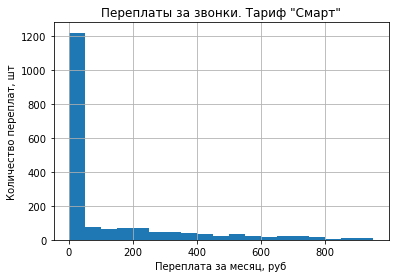

In [41]:
ax = df_money_v2[df_money_v2['tariff'] == 'smart']['calls'].hist(bins=list(range(0, 1000, 50)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за звонки. Тариф "Смарт"')
plt.show()

Мы видим, что очень большое количество пользователей укладывается в тариф, и не говорит по телефону сверх меры. Скорректируем график так, что бы принимать во внимание только тех пользователей, кто превышает лимит, установленный тарифом:

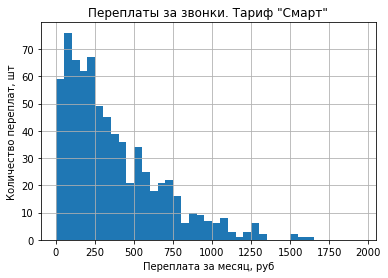

In [42]:
ax = df_money_v2[df_money_v2['tariff'] == 'smart']['calls'].hist(bins=list(range(1, 2001, 50)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за звонки. Тариф "Смарт"')
plt.show()

Проверим остальные полученные данные:

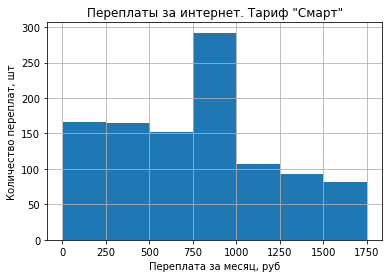

In [43]:
ax = df_money_v2[df_money_v2['tariff'] == 'smart']['internet'].hist(bins=list(range(1, 2001, 250)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за интернет. Тариф "Смарт"')
plt.show()

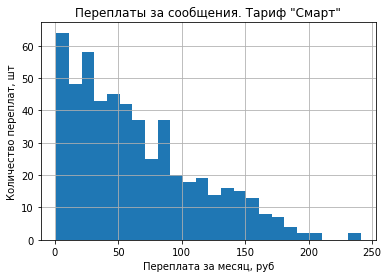

In [44]:
ax = df_money_v2[df_money_v2['tariff'] == 'smart']['messages'].hist(bins=list(range(1, 250, 10)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за сообщения. Тариф "Смарт"')
plt.show()

Проверим все то же самое, но для тарифа "Ультра":

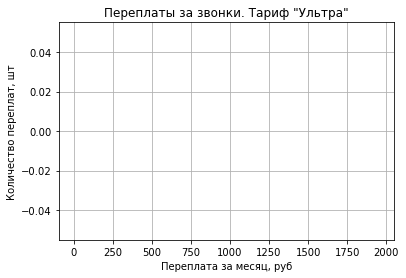

In [45]:
ax = df_money_v2[df_money_v2['tariff'] == 'ultra']['calls'].hist(bins=list(range(1, 2001, 50)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за звонки. Тариф "Ультра"')
plt.show()

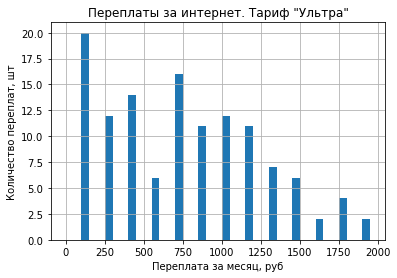

In [46]:
ax = df_money_v2[df_money_v2['tariff'] == 'ultra']['internet'].hist(bins=list(range(1, 2001, 50)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за интернет. Тариф "Ультра"')
plt.show()

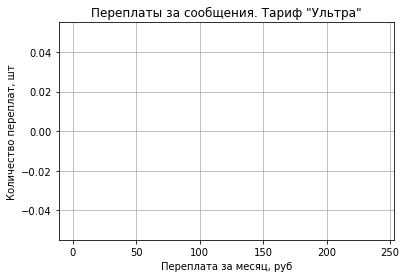

In [47]:
ax = df_money_v2[df_money_v2['tariff'] == 'ultra']['messages'].hist(bins=list(range(1, 250, 10)))
ax.set_xlabel(xlabel='Переплата за месяц, руб')
ax.set_ylabel(ylabel='Количество переплат, шт')
ax.set_title('Переплаты за сообщения. Тариф "Ультра"')
plt.show()

Как можно заметить, тут присутствуют переплаты только за интернет. Следовательно, возможно в тарифе заложено либо слишком много минут и сообщений и пользователи не успевают их потратить.

Теперь рассмотрим количество звонков, сообщений и потраченного трафика для каждого из тарифов, вне зависимости от превышения лимита по тарифу. Реализовывать мы это будем через написание очередной функции, которая выдаст нам Series со всеми значениями по месяцам:

In [48]:
numbers = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth', 'eleventh', 'twelfth']
def ser_for_hist(df, needed_type):
    '''Функция возвращает Series состоящий из данных о количестве потраченных минут/мегабайт/сообщений за каждый полный месяц использования тарифом'''
    lst = []
    for num in numbers:
        if needed_type == True:
            lst.extend(df[f'{num}_month_sum'].tolist())
        else:
            lst.extend(df[f'{num}_month_count'].tolist())
    return pd.Series(lst)

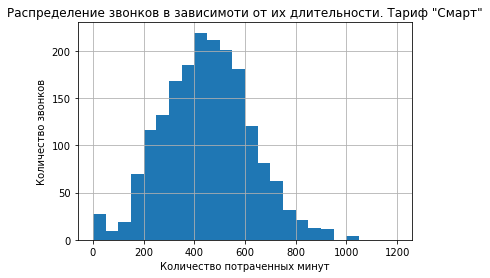

In [49]:
ax = ser_for_hist(df_calls_by_month[df_calls_by_month['tariff'] == 'smart'], True).hist(bins=list(range(0, 1250, 50)))
ax.set_xlabel(xlabel='Количество потраченных минут')
ax.set_ylabel(ylabel='Количество звонков')
ax.set_title('Распределение звонков в зависимоти от их длительности. Тариф "Смарт"')
plt.show()

Тут распределение больше напоминает нормальное, но скорее это все же распределение Стьюдента.

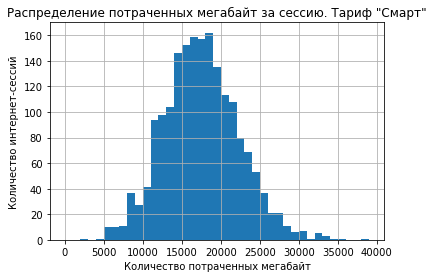

In [50]:
ax = ser_for_hist(df_internet_by_month[df_internet_by_month['tariff'] == 'smart'], True).hist(bins=list(range(0, 40000, 1000)))
ax.set_xlabel(xlabel='Количество потраченных мегабайт')
ax.set_ylabel(ylabel='Количество интернет-сессий')
ax.set_title('Распределение потраченных мегабайт за сессию. Тариф "Смарт"')
plt.show()

Та же картина. А что же с сообщениями?

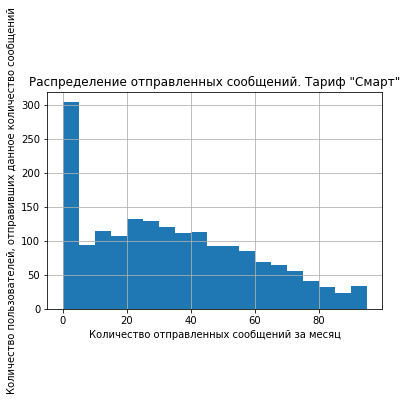

In [51]:
ax = ser_for_hist(df_messages_by_month[df_messages_by_month['tariff'] == 'smart'], False).hist(bins=list(range(0, 100, 5)))
ax.set_xlabel(xlabel='Количество отправленных сообщений за месяц')
ax.set_ylabel(ylabel='Количество пользователей, отправивших данное количество сообщений')
ax.set_title('Распределение отправленных сообщений. Тариф "Смарт"')
plt.show()

Тут датасет можно считать скошенным вправо. Построим те же графики для тарифа "Ультра":

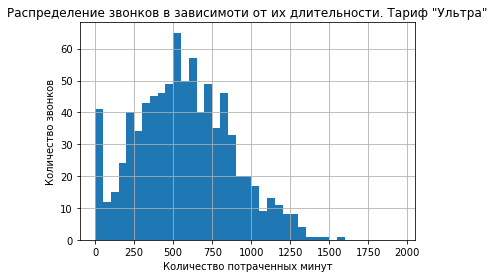

In [52]:
ax = ser_for_hist(df_calls_by_month[df_calls_by_month['tariff'] == 'ultra'], True).hist(bins=list(range(0, 2000, 50)))
ax.set_xlabel(xlabel='Количество потраченных минут')
ax.set_ylabel(ylabel='Количество звонков')
ax.set_title('Распределение звонков в зависимоти от их длительности. Тариф "Ультра"')
plt.show()

Изменился масштаб графика. Т.е. распределение стало с большим размахом, но меньшим средним, модой и медианой.

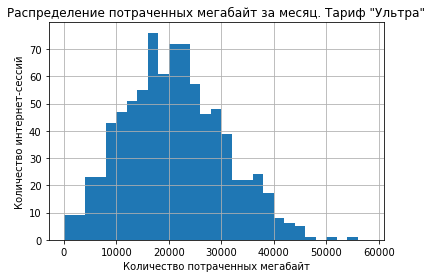

In [53]:
ax = ser_for_hist(df_internet_by_month[df_internet_by_month['tariff'] == 'ultra'], True).hist(bins=list(range(0, 60000, 2000)))
ax.set_xlabel(xlabel='Количество потраченных мегабайт')
ax.set_ylabel(ylabel='Количество интернет-сессий')
ax.set_title('Распределение потраченных мегабайт за месяц. Тариф "Ультра"')
plt.show()

Аналогично с гистограммой со звонками.

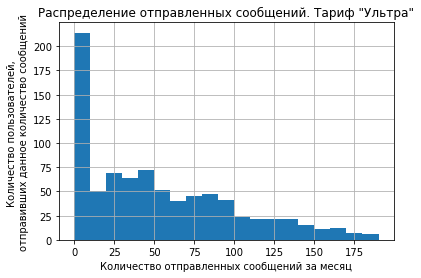

In [54]:
ax = ser_for_hist(df_messages_by_month[df_messages_by_month['tariff'] == 'ultra'], False).hist(bins=list(range(0, 200, 10)))
ax.set_xlabel(xlabel='Количество отправленных сообщений за месяц')
ax.set_ylabel(ylabel=f'Количество пользователей, \nотправивших данное количество сообщений')
ax.set_title('Распределение отправленных сообщений. Тариф "Ультра"')
plt.show()

Для всех графиков тип распределения при изменении тарифа не поменялся. Изменились лишь их меры центральных тенденций. Также следует обратить внимание, что на некоторых графиках присутствуют выбросы на нулевом значении. При расчетах потребуется учитывать это.

Посчитаем среднее, дисперсию и стандартное отклонение для каждой из величин, добавив для звонков и сообщений фильтр >0, что бы избавится от выбросов на нулевом значении:

In [55]:
def mds(series):
    '''Функция возвращает словарь, состоящий из среднего значения переданных функции данных, дисперсию и среднее отклонение'''
    m = series.mean()
    d = np.var(series)
    s = np.sqrt(d)
    return {'mean': m, 'dispersion': d, 'se': s}

In [56]:
lst = [ser_for_hist(df_calls_by_month[(df_calls_by_month['tariff'] == 'smart')], True).drop(0).dropna(),
       ser_for_hist(df_internet_by_month[df_internet_by_month['tariff'] == 'smart'], True).dropna(),
       ser_for_hist(df_messages_by_month[df_messages_by_month['tariff'] == 'smart'], False).drop(0).dropna(),
       ser_for_hist(df_calls_by_month[(df_calls_by_month['tariff'] == 'ultra')], True).drop(0).dropna(),
       ser_for_hist(df_internet_by_month[df_internet_by_month['tariff'] == 'ultra'], True).dropna(),
       ser_for_hist(df_messages_by_month[df_messages_by_month['tariff'] == 'ultra'], False).drop(0).dropna()
      ]
res_list = []
for el in lst:
    res_list.append(mds(el))
res_list

[{'mean': 449.96811902231667,
  'dispersion': 30245.552649915768,
  'se': 173.9124856067435},
 {'mean': 17487.542788104078,
  'dispersion': 22979958.8860989,
  'se': 4793.741637395459},
 {'mean': 35.93517534537726,
  'dispersion': 800.1339486674494,
  'se': 28.286639048629468},
 {'mean': 570.2819593787335,
  'dispersion': 93022.8237247152,
  'se': 304.9964323147325},
 {'mean': 20994.060799522653,
  'dispersion': 89584189.71900779,
  'se': 9464.89248322493},
 {'mean': 52.941457586618874,
  'dispersion': 2382.9129407667165,
  'se': 48.81508927336625}]

Что интересного вы видим в этих данных. Для тарифа смарт среднее значение потраченных минут не превышает лимит установленный тарифом, та же ситуация с сообщениями. Причем среднее значение по сообщениям и по минутам близко к лимиту установленному тарифом. Следовательно, количество минут и сообщений для этого тарифа подобраны оптимально. А вот среднее значение потраченного трафика значительно превышает лимит установленный тарифом. Возможно следует задуматься над увеличением лимита трафика для этого тарифа. С тарифом "ультра" ситуация немного иная. В среднем ни один из лимитов не достигается. Для этого тарифа можно уменьшить помесячную оплату вместе с лимитами на минуты и сообщения. Лимит траффика можно оставить, поскольку уже на этом этапе начинают встречаться превышения лимита.

## Проверка гипотез

Нам требуется проверить две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для начала проверим первую гипотезу. Нулевая гипотеза для неё будет звучать так:
***H$_0$: Средняя выручка тарифов «Ультра» и «Смарт» не отличается.***
Соответственно, альтернативная гипотеза будет звучать так:
***H$_1$: Средняя выручка тарифов «Ультра» и «Смарт» отличается.***
Посчитаем p-значение для этих данных. alpha примем за _`alpha = 0.05`_:

In [57]:
alpha = .05

results = st.ttest_ind(df_money_v2[df_money_v2['tariff'] == 'smart']['total'], df_money_v2[df_money_v2['tariff'] == 'ultra']['total'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  9.726422809076593e-115
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Повторяем то же самое для проверки второй гипотезы:

 * ***H$_0$: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов***
 * ***H$_1$: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов***

In [58]:
alpha = .05

results = st.ttest_ind(df_money_v2[df_money_v2['city'] == 'Москва']['total'], df_money_v2[df_money_v2['city'] == 'Другой']['total'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5970193520812996
Не получилось отвергнуть нулевую гипотезу


По итогам t-теста отвергнуть нулевую гипотезу не получилось.

## Выводы

Проведя исследование данных мы смогли прийти к выводу, что гипотеза о том, что ситуация с тарифом по Москве и по другим городам скорее всего не отличается. Зато с достаточно большой вероятностью можно утверждать, что выручка по различным тарифам отличается. Также после изучения данных мы смогли прийти к выводу, что для тарифа "Smart" можно увеличить лимит траффика покрыв это изменение, например, увеличением ежемесячной платы. В то же время ситуация для тарифа "Ultra" в корне отличается. Для этого тарифа можно уменьшить количество минут и сообщений, тем самым уменьшив ежемесячную плату по тарифу, и таким образом привлечь новых абонентов на этот тариф. С точки зрения популярности выигрывает тариф "Smart", и при увеличении трафика за фиксированную месячную оплату он станет еще более популярным.